In [1]:
import pandas as pd
from fbprophet import Prophet
from lstm_utils import get_raw_data

Using Theano backend.


In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Set Parameters

In [3]:
TRAIN_PERCENT = 0.9
STOCK_INDEX = '^GSPC'

## Getting Data

In [5]:
sp_df = get_raw_data(STOCK_INDEX)

## Preprocessing Data

In [6]:
# reset index to get date_time as a column
prophet_df = sp_df.reset_index()

# prepare the required dataframe
prophet_df.rename(columns={'index':'ds','Close':'y'},inplace=True)
prophet_df = prophet_df[['ds','y']]

In [7]:
# prepare train and test sets
train_size = int(prophet_df.shape[0]*TRAIN_PERCENT)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size+1:]

## Prepare Prophet Model

In [8]:
# build a prophet model
pro_model = Prophet()

## Fit the Model

In [9]:
# fit the model
pro_model.fit(train_df)

## Forecast

In [10]:
# prepare a future dataframe
test_dates = pro_model.make_future_dataframe(periods=test_df.shape[0])

# forecast values
forecast_df = pro_model.predict(test_dates)

## Plot Test Predictions

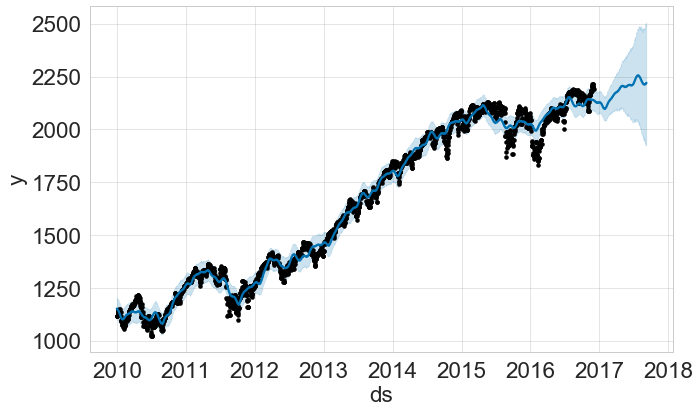

In [11]:
pro_model.plot(forecast_df)
plt.show()

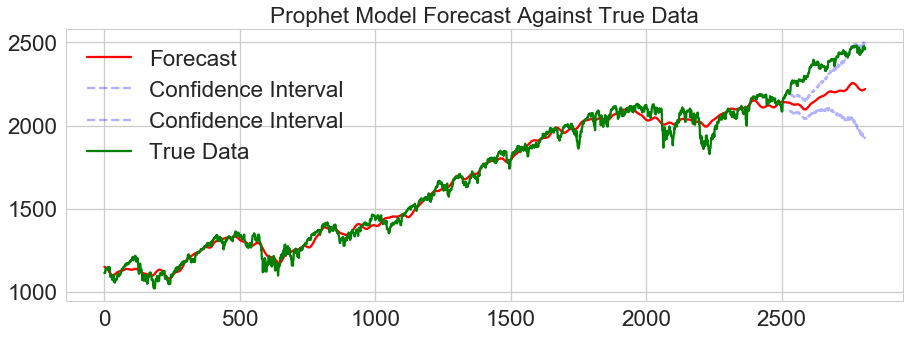

In [12]:
# plot against true data
plt.plot(forecast_df.yhat,c='r',label='Forecast')
plt.plot(forecast_df.yhat_lower.iloc[train_size+1:],
         linestyle='--',c='b',alpha=0.3,
         label='Confidence Interval')
plt.plot(forecast_df.yhat_upper.iloc[train_size+1:],
         linestyle='--',c='b',alpha=0.3,
         label='Confidence Interval')
plt.plot(prophet_df.y,c='g',label='True Data')
plt.legend()
plt.title('Prophet Model Forecast Against True Data')
plt.show()